In [3]:
import pandas as pd
rs=pd.read_csv(r"C:\Users\adiya\OneDrive\adiya\kaggle\reddit_breakup_dataset_cleaned.csv")
print("Here is the list of data:-")
display(rs)

Here is the list of data:-


,title,body,upvotes,comments_count,post_date,flair,url,author_age,relationship_length,top_comments
0,"Been on both sides of a breakup now, here’s wh...",Two weeks ago I ended a nearly 2 year relation...,259,129,2025-06-30 00:55:24,NaN,https://www.reddit.com/r/BreakUps/comments/1ln...,NaN,NaN,Well said. Just got dumped 2 days ago and the ...
1,I saw my ex with his new gf,I broke up with him on May 2nd. By June 6th he...,21,32,2025-06-30 14:21:49,NaN,https://www.reddit.com/r/BreakUps/comments/1lo...,NaN,NaN,You broke up with him. Did you also want him t...
2,Didn’t think losing someone who was already di...,"We hadn’t really been ""us"" for a while. The te...",22,5,2025-06-30 13:40:12,NaN,https://www.reddit.com/r/BreakUps/comments/1lo...,NaN,NaN,"ha, i'm there with you. i feel it all as well...."
3,7 year relationship gone in an instant.,I moved citys to live together and had our own...,54,9,2025-06-30 08:39:47,Trigger Warning,https://www.reddit.com/r/BreakUps/comments/1lo...,NaN,NaN,Wow. You are mentally very strong and kudos to...
4,When they come back it’s never worth it.,Post says it all. He came back after a few mon...,111,25,2025-06-30 03:54:54,NaN,https://www.reddit.com/r/BreakUps/comments/1ln...,NaN,NaN,It's only worth it when they come back after b...
...,...,...,...,...,...,...,...,...,...,...
943,How to get over a niche person?,"As the title says, how do you get over someone...",1,0,2025-06-27 21:54:39,NaN,https://www.reddit.com/r/BreakUps/comments/1lm...,NaN,NaN,NaN
944,the internet said “just block them” so i built...,blocking them is step 1. \nstep 2 is resistin...,1,0,2025-06-27 21:54:13,NaN,https://www.reddit.com/r/BreakUps/comments/1lm...,NaN,NaN,NaN
945,i turned my breakup spiral into a kit. i didn’...,literally just made it to keep myself from tex...,0,0,2025-06-27 21:53:48,NaN,https://www.reddit.com/r/BreakUps/comments/1lm...,NaN,NaN,NaN
946,i didn’t find a breakup guide that worked… so ...,every “healing” post online felt too pretty fo...,1,0,2025-06-27 21:53:16,NaN,https://www.reddit.com/r/BreakUps/comments/1lm...,NaN,NaN,NaN


extracting year from the data entry


In [6]:

rs['post_date'] = pd.to_datetime(rs['post_date'])
rs['post_year'] = rs['post_date'].dt.year
display(rs[['post_date', 'post_year']].head())

,post_date,post_year
0,2025-06-30 00:55:24,2025
1,2025-06-30 14:21:49,2025
2,2025-06-30 13:40:12,2025
3,2025-06-30 08:39:47,2025
4,2025-06-30 03:54:54,2025


analysis of the data using sentiment tool VaderSentiment tool

In [7]:
!pip install vaderSentiment
import nltk
try:
    nltk.data.find('sentiment/vader_lexicon.zip')
except LookupError:
    nltk.download('vader_lexicon')

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\adiya\AppData\Roaming\nltk_data...


In [13]:
analyzer = SentimentIntensityAnalyzer()
def get_sentiment(text):
    if not isinstance(text, str):
        return 'Neutral' # Handle non-string inputs

    scores = analyzer.polarity_scores(text)
    compound_score = scores['compound']

    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

rs['sentiment'] = rs['body'].apply(get_sentiment)

print("Sentiment analysis complete. Here's the head of the dataframe with the new 'sentiment' column:")
print(rs[['body', 'sentiment']].head())

Sentiment analysis complete. Here's the head of the dataframe with the new 'sentiment' column:
                                                body sentiment
0  Two weeks ago I ended a nearly 2 year relation...  Negative
1  I broke up with him on May 2nd. By June 6th he...  Negative
2  We hadn’t really been "us" for a while. The te...  Positive
3  I moved citys to live together and had our own...  Positive
4  Post says it all. He came back after a few mon...  Positive


C:\Users\adiya\AppData\Local\Temp\ipykernel_23000\840395172.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['maroon', 'midnightblue', 'gray'])


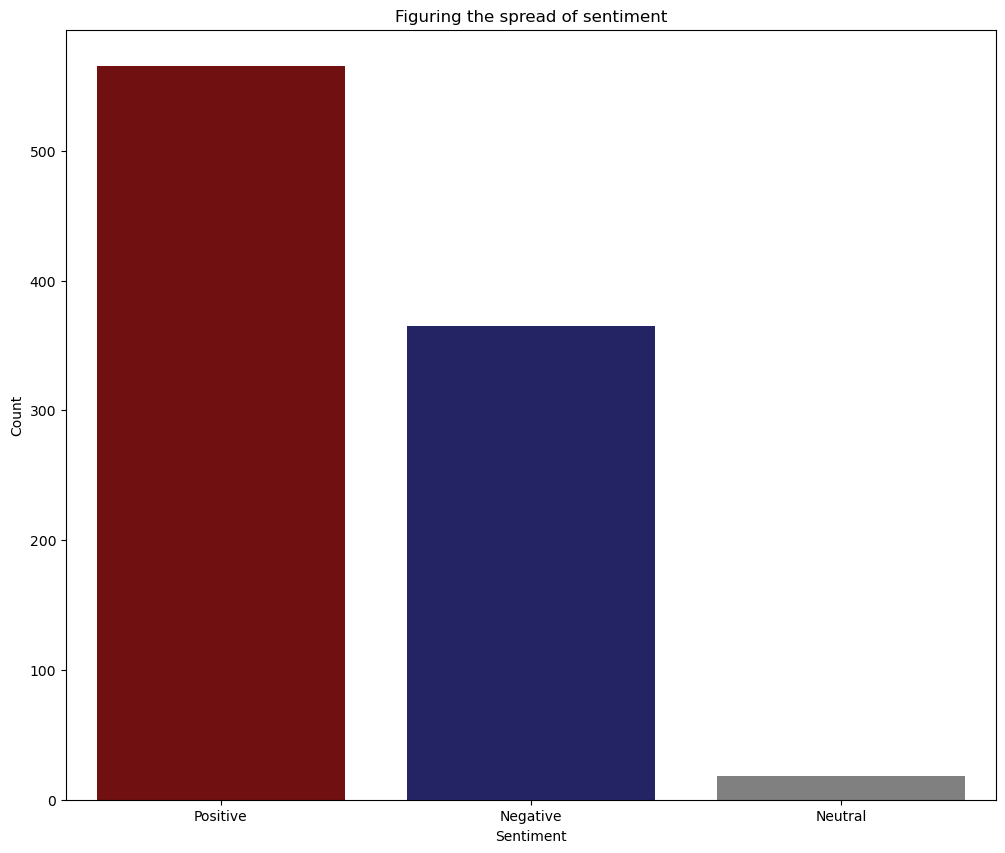

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sentiment_counts = rs['sentiment'].value_counts()
plt.figure(figsize=(12,10))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['maroon', 'midnightblue', 'gray'])
plt.title('Figuring the spread of sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

analyzing the comment section


In [21]:
rs['comments_sentiment'] = rs['top_comments'].apply(get_sentiment)
display(rs[['top_comments', 'comments_sentiment']].head())

,top_comments,comments_sentiment
0,Well said. Just got dumped 2 days ago and the ...,Negative
1,You broke up with him. Did you also want him t...,Negative
2,"ha, i'm there with you. i feel it all as well....",Negative
3,Wow. You are mentally very strong and kudos to...,Positive
4,It's only worth it when they come back after b...,Positive


,title,body,upvotes,comments_count,post_date,flair,url,author_age,relationship_length,top_comments,post_year,sentiment,comments_sentiment
0,"Been on both sides of a breakup now, here’s wh...",Two weeks ago I ended a nearly 2 year relation...,259,129,2025-06-30 00:55:24,NaN,https://www.reddit.com/r/BreakUps/comments/1ln...,NaN,NaN,Well said. Just got dumped 2 days ago and the ...,2025,Negative,Negative
1,I saw my ex with his new gf,I broke up with him on May 2nd. By June 6th he...,21,32,2025-06-30 14:21:49,NaN,https://www.reddit.com/r/BreakUps/comments/1lo...,NaN,NaN,You broke up with him. Did you also want him t...,2025,Negative,Negative
2,Didn’t think losing someone who was already di...,"We hadn’t really been ""us"" for a while. The te...",22,5,2025-06-30 13:40:12,NaN,https://www.reddit.com/r/BreakUps/comments/1lo...,NaN,NaN,"ha, i'm there with you. i feel it all as well....",2025,Positive,Negative
3,7 year relationship gone in an instant.,I moved citys to live together and had our own...,54,9,2025-06-30 08:39:47,Trigger Warning,https://www.reddit.com/r/BreakUps/comments/1lo...,NaN,NaN,Wow. You are mentally very strong and kudos to...,2025,Positive,Positive
4,When they come back it’s never worth it.,Post says it all. He came back after a few mon...,111,25,2025-06-30 03:54:54,NaN,https://www.reddit.com/r/BreakUps/comments/1ln...,NaN,NaN,It's only worth it when they come back after b...,2025,Positive,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,How to get over a niche person?,"As the title says, how do you get over someone...",1,0,2025-06-27 21:54:39,NaN,https://www.reddit.com/r/BreakUps/comments/1lm...,NaN,NaN,NaN,2025,Positive,Neutral
944,the internet said “just block them” so i built...,blocking them is step 1. \nstep 2 is resistin...,1,0,2025-06-27 21:54:13,NaN,https://www.reddit.com/r/BreakUps/comments/1lm...,NaN,NaN,NaN,2025,Negative,Neutral
945,i turned my breakup spiral into a kit. i didn’...,literally just made it to keep myself from tex...,0,0,2025-06-27 21:53:48,NaN,https://www.reddit.com/r/BreakUps/comments/1lm...,NaN,NaN,NaN,2025,Negative,Neutral
946,i didn’t find a breakup guide that worked… so ...,every “healing” post online felt too pretty fo...,1,0,2025-06-27 21:53:16,NaN,https://www.reddit.com/r/BreakUps/comments/1lm...,NaN,NaN,NaN,2025,Negative,Neutral


visualize the distribution of comment sentiments with respect to the main data

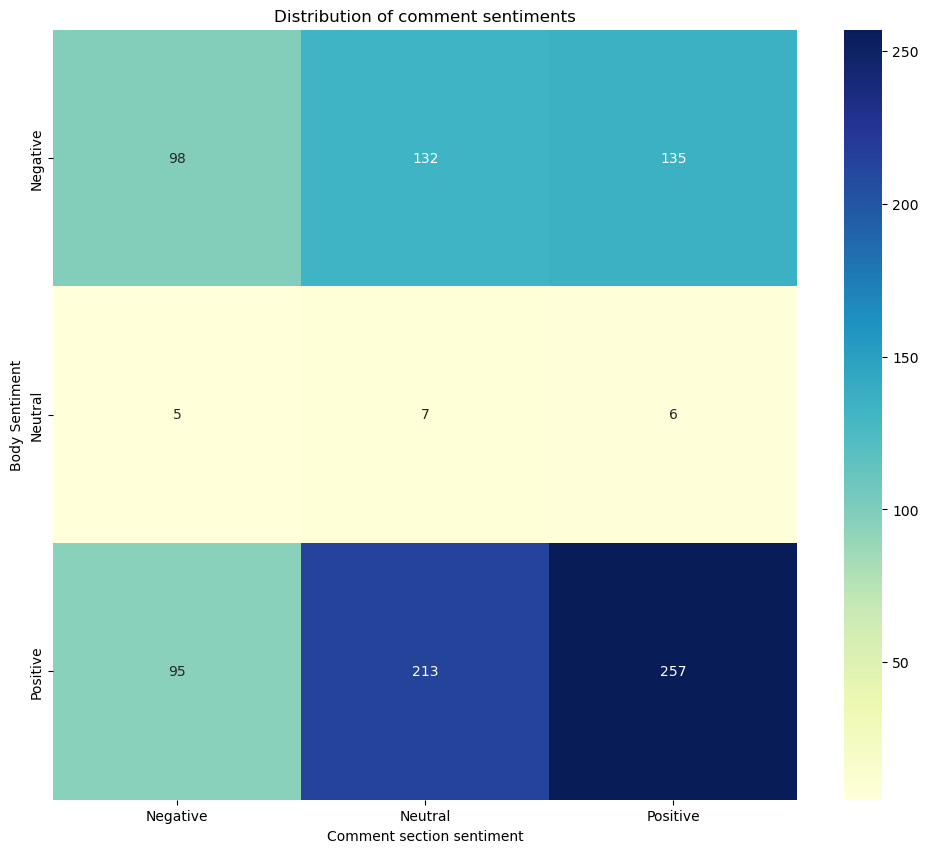

Relationship between Body Sentiment and Comments Sentiment:


comments_sentiment,Negative,Neutral,Positive
sentiment,,,
Negative,98,132,135
Neutral,5,7,6
Positive,95,213,257


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sentiment_distribution = rs.groupby(['sentiment', 'comments_sentiment']).size().unstack()

plt.figure(figsize=(12,10))
sns.heatmap(sentiment_distribution, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Distribution of comment sentiments')
plt.xlabel('Comment section sentiment')
plt.ylabel('Body Sentiment')
plt.show()
print("Relationship between Body Sentiment and Comments Sentiment:")
sentiment_relationship = sentiment_distribution 
display(sentiment_relationship)

display of wordcloud of most occured words

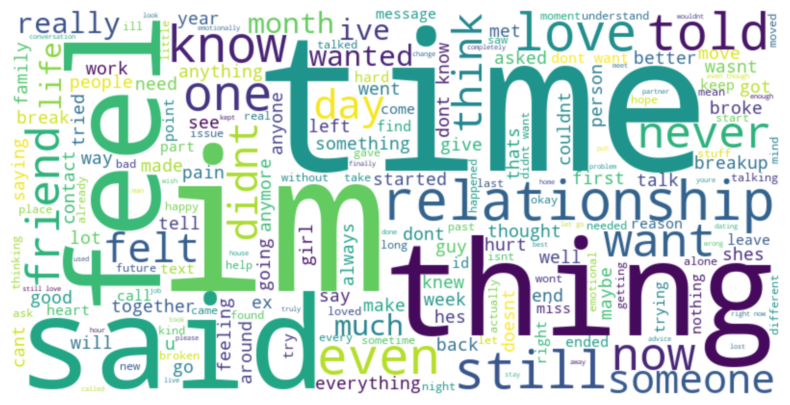

In [29]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from wordcloud import STOPWORDS

text = ' '.join(rs['body'].astype(str).tolist())
text = re.sub(r'[^A-Za-z\s]', '', text)
text = text.lower()
stopwords = set(STOPWORDS)
text = ' '.join(word for word in text.split() if word not in stopwords)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text) 

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bicubic')
plt.axis('off')
plt.show()